In [35]:
#Step1: Extract and filter the data 
import numpy as np
import json
import statistics
# Replace 'your_file.json' with the path to your actual .json file
file_path = 'Data File/Dead data/60.2m(3).json'

with open(file_path, 'r') as file:
    data = json.load(file)

# Initialize an empty array to store RSSI values
rssi_values = []
rssi_values2 = []
rssi_values3 = []

# GatewayID: Insert the name of the gateway
specific_gateway_id = "rB8J//4G/PI=" #Gatewayid is rB8J//4G/PI= 

# Loop through each item in the data list
for item in data:
    # Check if 'rxInfo' is present in the item's payload
    if 'rxInfo' in item["payload"]:
        # Access the list of rxInfo within the payload
        rx_info_list = item["payload"]["rxInfo"]
        # Loop through each rxInfo item
        for rx_info in rx_info_list:
            # Check if the gatewayID matches the specific one we're looking for
            if rx_info["gatewayID"] == specific_gateway_id:
                # If it matches, append the rssi value to the rssi_values list
                rssi_values.append(rx_info["rssi"])
#----------------------------------------------------------------------------------------------------------------#
# GatewayID: Insert the name of the gateway
specific_gateway_id2 = "rB8J//4G/PI=" #Gatewayid is rB8J//4G/PI=

# Loop through each item in the data list
for item in data:
    # Check if 'rxInfo' is present in the item's payload
    if 'rxInfo' in item["payload"]:
        # Access the list of rxInfo within the payload
        rx_info_list = item["payload"]["rxInfo"]
        # Loop through each rxInfo item
        for rx_info in rx_info_list:
            # Check if the gatewayID matches the specific one we're looking for
            if rx_info["gatewayID"] == specific_gateway_id2:
                # If it matches, append the rssi value to the rssi_values list
                rssi_values2.append(rx_info["rssi"])

#----------------------------------------------------------------------------------------------------------------#
# GatewayID: Insert the name of the gateway
specific_gateway_id3 = "rB8J//4G/PI=" #Gatewayid is rB8J//4G/PI=

# Loop through each item in the data list
for item in data:
    # Check if 'rxInfo' is present in the item's payload
    if 'rxInfo' in item["payload"]:
        # Access the list of rxInfo within the payload
        rx_info_list = item["payload"]["rxInfo"]
        # Loop through each rxInfo item
        for rx_info in rx_info_list:
            # Check if the gatewayID matches the specific one we're looking for
            if rx_info["gatewayID"] == specific_gateway_id3:
                # If it matches, append the rssi value to the rssi_values list
                rssi_values3.append(rx_info["rssi"])
    
# At this point, rssi_values contains the RSSI values for the specific gatewayID
print(rssi_values)
print(rssi_values2)
print(rssi_values3)

# Filter the raw RSSI data using Kalman for multiple arrays
def initialize_kalman_params(rssi_data):
    std_dev = statistics.stdev(rssi_data)
    variance = pow(std_dev, 2)
    mean_value = np.mean(rssi_data)
    return std_dev, variance, mean_value

def kalman_filter(rssi_data, std_dev, variance, mean_value):
    # Define the Kalman filter parameters and initial values
    A = 1
    H = 1
    Q = 0
    R = variance
    x = mean_value
    P = 10
    firstRun = True

    def simple_kalman(z):
        nonlocal A, H, Q, R, x, P, firstRun
        if firstRun:
            firstRun = False

        # Kalman algorithm
        xp = A * x
        Pp = A * P * A + Q
        K = Pp * H / (H * Pp * H + R)
        x = xp + K * (z - H * xp)
        P = Pp - K * H * Pp
        return x

    Nsamples = len(rssi_data)
    Xsaved = np.zeros(Nsamples)
    Zsaved = np.zeros(Nsamples)

    for k in range(Nsamples):
        z = rssi_data[k]
        filtered_value = simple_kalman(z)
        Xsaved[k] = filtered_value
        Zsaved[k] = z

    return Xsaved, Zsaved

# Initialize and filter each RSSI data array
std_dev1, variance1, mean_value1 = initialize_kalman_params(rssi_values)
Xsaved1, Zsaved1 = kalman_filter(rssi_values, std_dev1, variance1, mean_value1)

std_dev2, variance2, mean_value2 = initialize_kalman_params(rssi_values2)
Xsaved2, Zsaved2 = kalman_filter(rssi_values2, std_dev2, variance2, mean_value2)

std_dev3, variance3, mean_value3 = initialize_kalman_params(rssi_values3)
Xsaved3, Zsaved3 = kalman_filter(rssi_values3, std_dev3, variance3, mean_value3)

# Calculate distances from the filtered RSSI values
def calculate_distance(filtered_values, std_dev, T_value, fitlered_na_values_outdoor):
    dis = []
    for value in filtered_values:
        k = (value - (-74.47749507304725) - T_value) / (-10 * fitlered_na_values_outdoor)
        kpow = pow(10, k) * 26.8
        dis.append(kpow)
    return dis

fitlered_na_values_outdoor = 2.669653591426876
fitlered_na_values_outdoor2 = 2.669653591426876
fitlered_na_values_outdoor3 = 2.669653591426876

dis1 = calculate_distance(Xsaved1, std_dev1, std_dev1, fitlered_na_values_outdoor)
dis2 = calculate_distance(Xsaved2, std_dev2, std_dev2, fitlered_na_values_outdoor2)
dis3 = calculate_distance(Xsaved3, std_dev3, std_dev3, fitlered_na_values_outdoor3)

# Store std_dev, variance, mean_value, and mean_distance in arrays
std_devs = np.array([std_dev1, std_dev2, std_dev3])
variances = np.array([variance1, variance2, variance3])
mean_values = np.array([mean_value1, mean_value2, mean_value3])
mean_distances = np.array([np.mean(dis1), np.mean(dis2), np.mean(dis3)])

# Print results
print("Standard Deviations: ", std_devs)
print("Variances: ", variances)
print("Mean Values: ", mean_values)
print("Mean Distances: ", mean_distances)

[-77, -78, -77, -74, -77, -81, -82, -78, -76, -79, -81, -72, -74, -81, -80, -77, -76, -81, -80, -74, -74, -79, -77, -80, -76, -73, -79, -81, -77, -74, -80, -77, -77, -72, -80, -78, -76, -76, -81, -78, -78, -67, -82, -82, -71, -76, -82, -82, -77, -74, -81, -79, -77, -74, -77, -78, -74, -76, -77, -78, -76, -76, -78, -78, -75, -73, -81, -81, -75, -75, -78, -81, -75, -74]
[-77, -78, -77, -74, -77, -81, -82, -78, -76, -79, -81, -72, -74, -81, -80, -77, -76, -81, -80, -74, -74, -79, -77, -80, -76, -73, -79, -81, -77, -74, -80, -77, -77, -72, -80, -78, -76, -76, -81, -78, -78, -67, -82, -82, -71, -76, -82, -82, -77, -74, -81, -79, -77, -74, -77, -78, -74, -76, -77, -78, -76, -76, -78, -78, -75, -73, -81, -81, -75, -75, -78, -81, -75, -74]
[-77, -78, -77, -74, -77, -81, -82, -78, -76, -79, -81, -72, -74, -81, -80, -77, -76, -81, -80, -74, -74, -79, -77, -80, -76, -73, -79, -81, -77, -74, -80, -77, -77, -72, -80, -78, -76, -76, -81, -78, -78, -67, -82, -82, -71, -76, -82, -82, -77, -74, -81, -7

In [1]:
import os
import numpy as np
import pandas as pd
import math
from scipy.optimize import minimize, rosen, rosen_der


def distanceGPS(lat1, lon1 ,lat2, lon2):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    # lat1, lon1 = origin
    # lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

def distancelatlon(origin ,destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d


locations =[ (43.615459, 7.072282),(43.614775, 7.073123),(43.614198, 7.072174)] #Look it up the json file
distances = mean_distances
# distances = [0.04728,0.084528,0.094328]


initial_location =  (43.0, 7.0) # 43.0, 7.0
gps_location = (43.615046, 7.072142)

def euclidean_distance(x1, y1, x2, y2):
    p1 = np.array((x1 ,y1))
    p2 = np.array((x2, y2))
    return np.linalg.norm(p1-p2)
# Mean Square Error
# locations: [ (lat1, long1), ... ]
# distances: [ distance1, ... ]
def mse(x, locations, distances): 
    mse = 0.0
    for location, distance in zip(locations, distances):
        distance_calculated = distanceGPS(x[0], x[1], location[0], location[1])
        mse += math.pow(distance_calculated - distance, 2.0)
    return mse / len(distances)


# Initial point: the point with the closest distance
# min_distance     = float('inf')
# closest_location = None
# for member in data:
#     # A new closest point!
#     if member['distance'] < min_distance:
#         min_distance = member['distance']
#         closest_location = member['location']
# initial_location = closest_location

# initial_location: (lat, long)
# locations: [ (lat1, long1), ... ]
# distances: [ distance1,     ... ] 
result = minimize(
    mse,                         # The error function
    initial_location,            # The initial guess
    args=(locations, distances), # Additional parameters for mse
    method='L-BFGS-B',           # The optimisation algorithm
    options={
        'ftol':1e-5,         # Tolerance
        'maxiter': 1e+7      # Maximum iterations
    })
location = result.x #estimated location after minimizing 

error = euclidean_distance(location[0],location[1] , gps_location[0], gps_location[1])
error2 = distanceGPS(location[0],location[1] , gps_location[0], gps_location[1])

d1= distancelatlon(gps_location,locations[0])
d2= distancelatlon(gps_location,locations[1])
d3= distancelatlon(gps_location,locations[2])

gps_distances = np.array([d1, d2, d3])
#draw the bar chart compared the gps distances and rssi distances

NameError: name 'mean_distances' is not defined

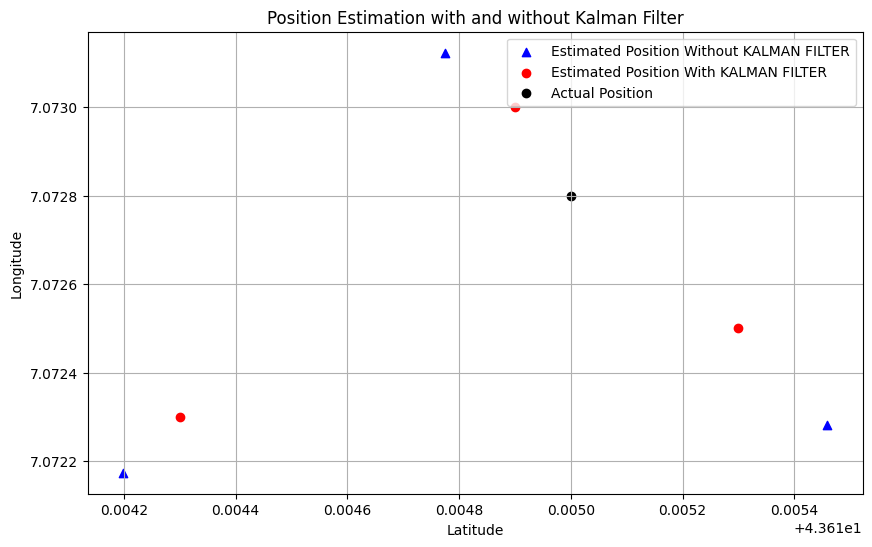

In [3]:
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
locations_without_kalman = [(43.615459, 7.072282), (43.614775, 7.073123), (43.614198, 7.072174)]
locations_with_kalman = [(43.615300, 7.072500), (43.614900, 7.073000), (43.614300, 7.072300)]
actual_location = (43.615000, 7.072800)  # Replace with your actual position

# Separate the coordinates for plotting
x_without_kalman, y_without_kalman = zip(*locations_without_kalman)
x_with_kalman, y_with_kalman = zip(*locations_with_kalman)
x_actual, y_actual = actual_location

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(x_without_kalman, y_without_kalman, c='blue', marker='^', label='Estimated Position Without KALMAN FILTER') #can change it to gps or distance without T value
plt.scatter(x_with_kalman, y_with_kalman, c='red', marker='o', label='Estimated Position With KALMAN FILTER')
plt.scatter([x_actual], [y_actual], c='black', marker='o', edgecolor='black', label='Actual Position')

# Label the axes
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Add a title
plt.title('Position Estimation with and without Kalman Filter')

# Add a legend
plt.legend()

# Add grid
plt.grid(True)

# Show the plot
plt.show()


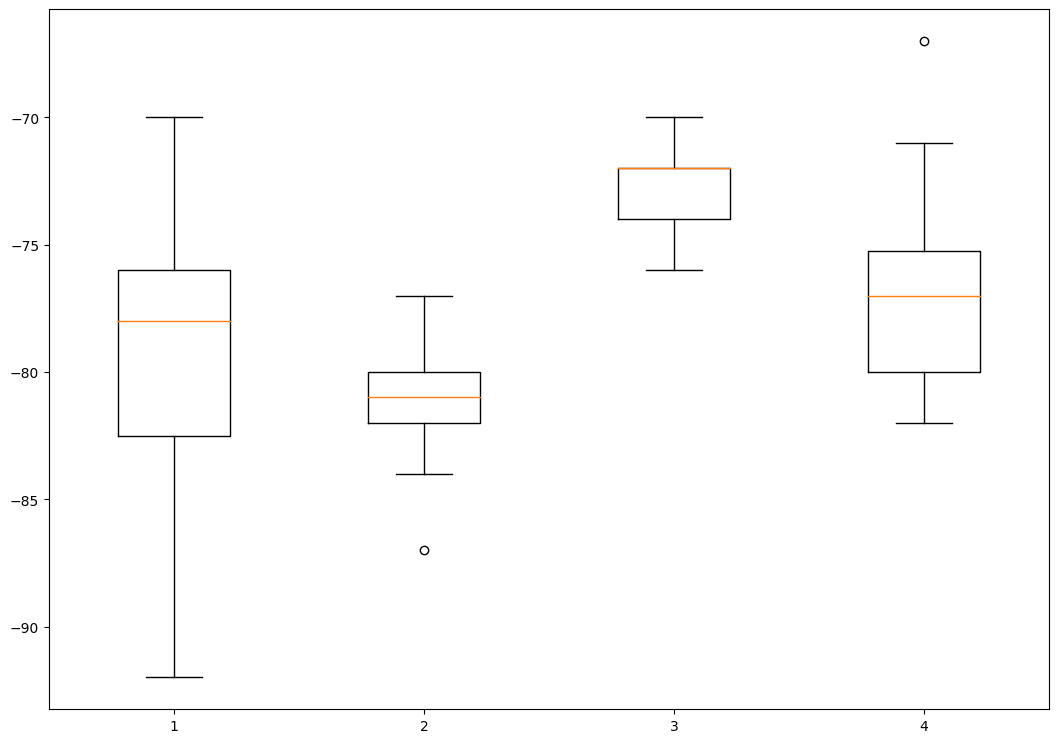

In [36]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Creating dataset
np.random.seed(10)

data_1 = [-80, -84, -76, -75, -76, -80, -79, -81, -83, -78, -70, -74, -72, -75, -72, -72, -72, -77, -74, -74, -76, -74, -75, -77, -78, -84, -81, -77, -78, -77, -80, -76, -74, -78, -76, -78, -77, -78, -82, -80, -77, -83, -84, -80, -84, -86, -78, -82, -84, -84, -84, -77, -82, -74, -88, -76, -75, -76, -92, -85, -83, -88, -85]
data_2 = [-83, -81, -81, -82, -81, -84, -77, -82, -80, -79, -78, -80, -79, -80, -80, -82, -81, -84, -82, -84, -83, -83, -84, -87, -80, -78, -80, -82, -81, -82, -82, -78, -80, -82, -84, -82, -81, -80, -81, -80, -80, -81, -80, -78, -80, -78, -78, -78, -81, -82, -77, -82, -82, -84, -82]
data_3 = [-72, -74, -72, -72, -72, -72, -74, -74, -74, -72, -71, -74, -72, -72, -74, -72, -71, -72, -74, -74, -71, -74, -74, -72, -74, -74, -75, -72, -72, -74, -72, -71, -70, -72, -72, -72, -71, -72, -72, -70, -72, -72, -71, -74, -71, -74, -70, -76, -71, -76, -74, -74, -72, -74, -71, -71, -74, -74, -74, -74, -76, -72, -72, -72, -72]
data_4 = [-77, -78, -77, -74, -77, -81, -82, -78, -76, -79, -81, -72, -74, -81, -80, -77, -76, -81, -80, -74, -74, -79, -77, -80, -76, -73, -79, -81, -77, -74, -80, -77, -77, -72, -80, -78, -76, -76, -81, -78, -78, -67, -82, -82, -71, -76, -82, -82, -77, -74, -81, -79, -77, -74, -77, -78, -74, -76, -77, -78, -76, -76, -78, -78, -75, -73, -81, -81, -75, -75, -78, -81, -75, -74]
data = [data_1, data_2, data_3, data_4]

fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(data)

# show plot
plt.show()

In [43]:

# Get descriptive statistics
description = data_1.describe()

print(description)

AttributeError: 'list' object has no attribute 'describe'